# Mount Google Drive



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Download the data



In [ ]:
!wget ‐‐directory-prefix="/content/gdrive/MyDrive/Colab Notebooks/Assignment" nipg1.inf.elte.hu:8765/fer2013.csv

--2021-11-02 15:10:46--  http://xn--directory-prefix=-pz2ja/content/gdrive/MyDrive/Colab%20Notebooks/Assignment1
Resolving xn--directory-prefix=-pz2ja (xn--directory-prefix=-pz2ja)... failed: Name or service not known.
wget: unable to resolve host address ‘xn--directory-prefix=-pz2ja’
--2021-11-02 15:10:47--  http://nipg1.inf.elte.hu:8765/fer2013.csv
Resolving nipg1.inf.elte.hu (nipg1.inf.elte.hu)... 157.181.160.161
Connecting to nipg1.inf.elte.hu (nipg1.inf.elte.hu)|157.181.160.161|:8765... connected.
HTTP request sent, awaiting response... 200 OK
Length: 301072766 (287M) [text/csv]
Saving to: ‘fer2013.csv’

fer2013.csv         100%[===================>] 287.12M  15.3MB/s    in 15s     

2021-11-02 15:11:02 (19.0 MB/s) - ‘fer2013.csv’ saved [301072766/301072766]

FINISHED --2021-11-02 15:11:02--
Total wall clock time: 16s
Downloaded: 1 files, 287M in 15s (19.0 MB/s)


# Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import keras,os
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn  as  sns

# Read the data

In [ ]:
raw_data = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/Assignment/fer2013.csv")

data = np.array(raw_data)
classes = [ "Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]

raw_data

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest


## Analyze the data

* Splitting the test data into Training, Validation, Test sets
* Convert pixel data to images
* Visualize some sample data

In [ ]:
def convert_to_images(df_col):
  images = []
  for index, row in df_col.iterrows():
    pxls=[]
    pxls.append(np.array(row[0].split(' '), dtype="float32") / 255.0) # normalizing the image
    pxls = np.asarray(pxls)
    pxls = pxls.reshape(48,48)  # dimensions of the image
    image = np.zeros((48,48,3))  # empty matrix
    image[:,:,0] = pxls
    image[:,:,1] = pxls
    image[:,:,2] = pxls
    images.append(image)
  return images

# Train data
x_train = np.array(convert_to_images(raw_data[raw_data['Usage'] == 'Training'].drop(columns=['emotion', 'Usage'])))
y_train = np.array(raw_data[raw_data['Usage'] == 'Training'].drop(columns=['Usage', 'pixels']))

# Test data
x_test = np.array(convert_to_images(raw_data[raw_data['Usage'] == 'PrivateTest'].drop(columns=['emotion', 'Usage'])))
y_test = np.array(raw_data[raw_data['Usage'] == 'PrivateTest'].drop(columns=['Usage', 'pixels']))

# Validation data
x_val = np.array(convert_to_images(raw_data[raw_data['Usage'] == 'PublicTest'].drop(columns=['emotion', 'Usage'])))
y_val = np.array(raw_data[raw_data['Usage'] == 'PublicTest'].drop(columns=['Usage', 'pixels']))

## Visualization of the data

TRAIN DATA EXAMPLES: 


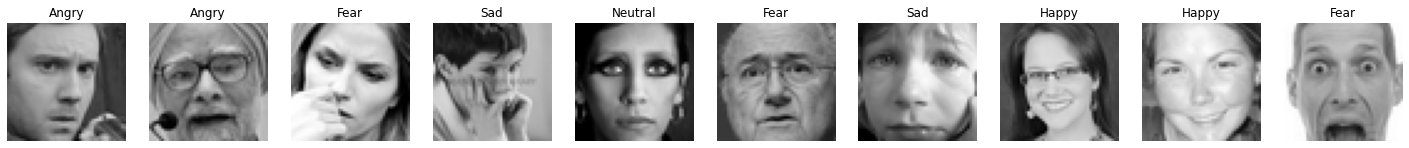

TEST DATA EXAMPLES: 


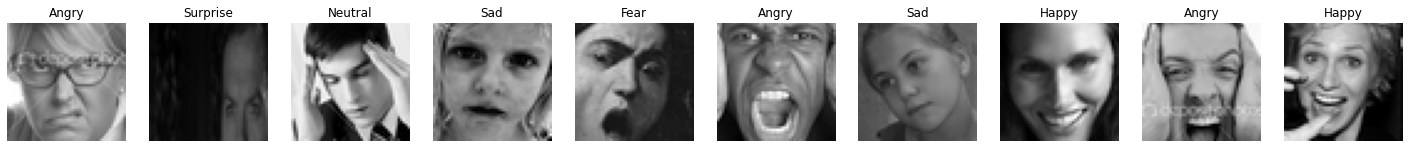

VALIDATION DATA EXAMPLES: 


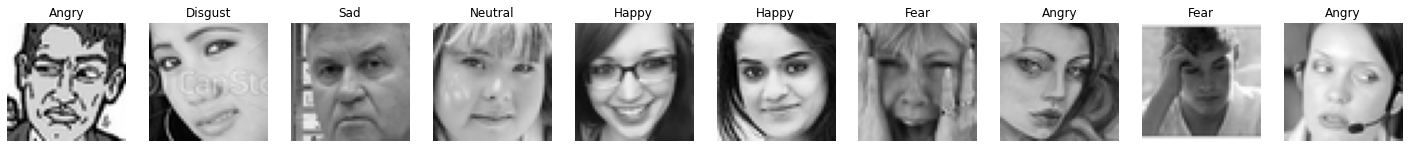

In [ ]:
# Visualizing the input data
print("TRAIN DATA EXAMPLES: ")
plt.figure(figsize=(25, 5)) # specifying the overall grid size
for i in range(10):
    plt.subplot(1,10,i+1)    # the number of images in the grid is 6*5 (30)
    plt.axis('off')
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.title(classes[y_train[i][0]])
plt.show()

print("TEST DATA EXAMPLES: ")
plt.figure(figsize=(25, 5))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.axis('off')
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.title(classes[y_test[i][0]])
plt.show()

print("VALIDATION DATA EXAMPLES: ")
plt.figure(figsize=(25, 5))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.axis('off')
    plt.imshow(x_val[i], cmap=plt.cm.binary)
    plt.title(classes[y_val[i][0]])
plt.show()

## Histogram of the labels

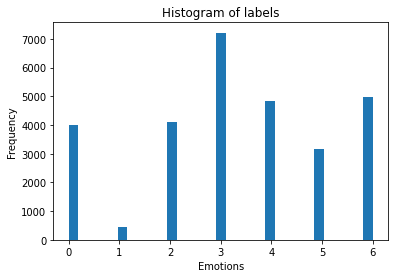

Emotions:

0  -  Angry
1  -  Disgust
2  -  Fear
3  -  Happy
4  -  Sad
5  -  Surprise
6  -  Neutral


In [ ]:
plt.hist(y_train, bins='auto')
plt.ylabel('Frequency')
plt.xlabel('Emotions')
plt.title('Histogram of labels')
plt.show()

print("Emotions:\n")
for i in range(len(classes)):
  print(i, " - ", classes[i])

# Data Preprocessing & Augmentation




In [33]:
# Stuff for training
num_classes = len(classes)
input_shape = (48, 48, 3)
batch_size = 128

generator = ImageDataGenerator(
    rotation_range=10, horizontal_flip=True, zoom_range=0.1
)

# Validation and test data is not augmented
generator_noaug = ImageDataGenerator()

train_data = generator.flow(x_train, y_train, batch_size)
valid_data = generator_noaug.flow(x_val, y_val, batch_size)
test_data = generator_noaug.flow(x_test, y_test, batch_size)

# Model definition and training



In [34]:
# Use VGG16 and some predefined weights for the base of the model
base_model = tf.keras.applications.VGG16(input_shape=(48,48,3), pooling='avg', include_top=False, weights="imagenet")

for layer in base_model.layers:
  if layer.name == "block5_conv1" or layer.name == "block5_conv2" or \
  layer.name == "block5_conv3" or layer.name == "block5_pool":
    layer.trainable = True
  else:
    layer.trainable=False

# base_model.summary()

model = Sequential()
model.add(base_model)

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer="rmsprop", loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 512)               14714688  
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1024)              4096      
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 7175      
Total params: 15,251,271
Trainable params: 7,613,959
Non-trainable params: 7,637,312
_________________________________________________________________


## Train the model

* Define Learning Rate Scheduler callback function
* Define Early Stopping callback function
* Train the model
* Plot model accuracy, loss on train and validation data



In [35]:
# Learning Rate Scheduler
def LRScheduler(epoch, lr):
  if epoch < 7:
    return lr
  else:
    return lr * np.exp(-0.1)

callbacks = []

# Early Stopping
# Stops the training when there is no improvement in the validation accuracy, 
# validation loss for 4 consecutive epochs
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4)
es2 = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=4)

# callbacks.append(es)
callbacks.append(es2)

# Applies LRS
ls = tf.keras.callbacks.LearningRateScheduler(LRScheduler)
callbacks.append(ls)

Epoch 1/20
225/225 [==============================] - 34s 151ms/step - loss: 235.9102 - accuracy: 0.1806 - val_loss: 120.7651 - val_accuracy: 0.2914
Epoch 2/20
225/225 [==============================] - 34s 150ms/step - loss: 245.2762 - accuracy: 0.1815 - val_loss: 121.0921 - val_accuracy: 0.2396
Epoch 3/20
225/225 [==============================] - 34s 150ms/step - loss: 249.8205 - accuracy: 0.1808 - val_loss: 124.2951 - val_accuracy: 0.3023
Epoch 4/20
225/225 [==============================] - 34s 150ms/step - loss: 255.5978 - accuracy: 0.1819 - val_loss: 121.0235 - val_accuracy: 0.1914
Epoch 5/20
225/225 [==============================] - 34s 151ms/step - loss: 261.4341 - accuracy: 0.1808 - val_loss: 132.3062 - val_accuracy: 0.1371
Epoch 6/20
225/225 [==============================] - 34s 150ms/step - loss: 266.8252 - accuracy: 0.1774 - val_loss: 127.2544 - val_accuracy: 0.3009
Epoch 7/20
225/225 [==============================] - 34s 150ms/step - loss: 272.1953 - accuracy: 0.1782 -

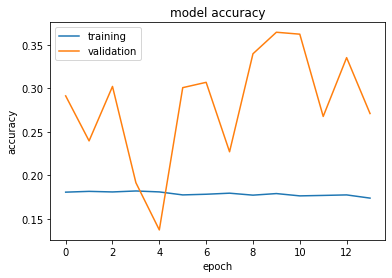

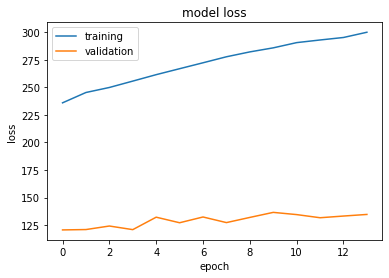

In [46]:
# Fit the model with the defined arguments

history = model.fit(x=train_data, validation_data=valid_data, epochs=20, batch_size=batch_size, callbacks=callbacks)

print("Epochs ran: ", len(history.history['loss']))

# plt.subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

# plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

In [47]:
model.save('/content/gdrive/MyDrive/Trained weights/Assignment/unbalanced_27_.h5')

# Test and evaluate the model

In [49]:
# Load the model if needed
model = keras.models.load_model('/content/gdrive/MyDrive/Trained weights/Assignment/unbalanced_27_.h5')

In [50]:
# Test the model's performance
test_loss, test_acc = model.evaluate(test_data)
print("Tested accuracy: ", np.floor(100 * test_acc), "% \n")

# Using the model
prediction = model.predict(test_data)

# Helper arrays for later
y_test_arr = np.squeeze(np.asarray(y_test))
prediction_arr = np.argmax(prediction, axis=1)

29/29 [==============================] - 2s 66ms/step - loss: 134.3195 - accuracy: 0.2814
Tested accuracy:  28.0 % 



## Visualizing some misclassified examples

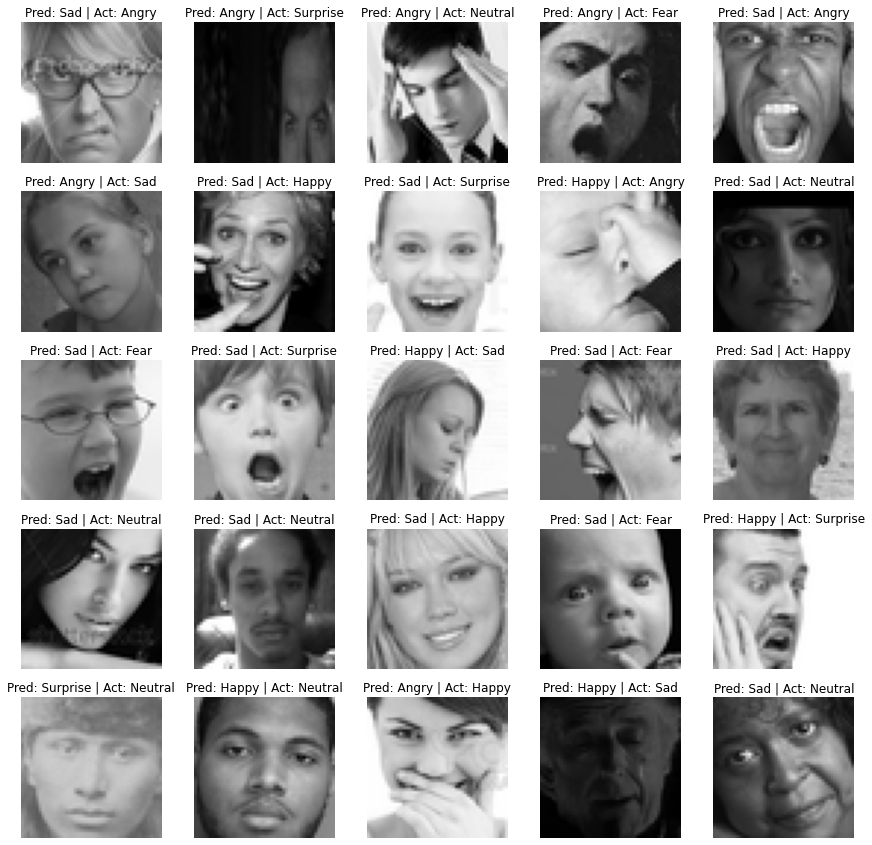

In [51]:
plt.figure(figsize=(15,15)) # specifying the overall grid size

imidx = 0
miss_imgs = [] # For the misclassified images
miss_idx = [] # For the indexes
while (len(miss_imgs) < 25):
  if prediction_arr[imidx] != y_test_arr[imidx]:
    miss_imgs.append(x_test[imidx])
    miss_idx.append(imidx)
  imidx += 1

for i in range(25):
    plt.subplot(5,5,i+1)    # the number of images in the grid is 5*5 (25)
    plt.axis('off')
    plt.imshow(miss_imgs[i], cmap=plt.cm.binary)
    plt.title("Pred: " + classes[prediction_arr[miss_idx[i]]] + " | Act: " + classes[y_test_arr[miss_idx[i]]])
plt.show()

## Balancing the data by loss function weighting

Emotions count in data:
0  -  Angry   4953
1  -  Disgust   547
2  -  Fear   5121
3  -  Happy   8989
4  -  Sad   6077
5  -  Surprise   4002
6  -  Neutral   6198
Epoch 1/15
225/225 [==============================] - 36s 152ms/step - loss: 369987.4062 - accuracy: 0.1472 - val_loss: 53.0654 - val_accuracy: 0.1101
Epoch 2/15
225/225 [==============================] - 34s 150ms/step - loss: 405763.1875 - accuracy: 0.1700 - val_loss: 51.8462 - val_accuracy: 0.0908
Epoch 3/15
225/225 [==============================] - 34s 150ms/step - loss: 445055.0000 - accuracy: 0.1848 - val_loss: 55.5688 - val_accuracy: 0.2070
Epoch 4/15
225/225 [==============================] - 34s 151ms/step - loss: 488466.5625 - accuracy: 0.1872 - val_loss: 57.3583 - val_accuracy: 0.4308
Epoch 5/15
225/225 [==============================] - 34s 152ms/step - loss: 531222.3750 - accuracy: 0.1967 - val_loss: 70.1433 - val_accuracy: 0.4023
Epoch 6/15
225/225 [==============================] - 34s 151ms/step - loss: 572396.3

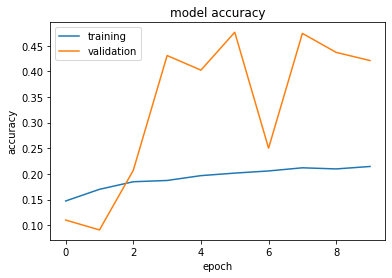

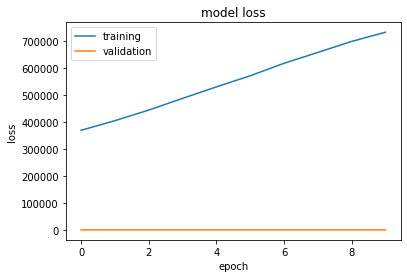

In [57]:
emotions_in_data = np.array(raw_data.drop(columns=['Usage', 'pixels']))
emotions_in_data = np.squeeze(np.asarray(emotions_in_data))
emotions_in_data = emotions_in_data.tolist()

print("Emotions count in data:")

class_weights = {}

for i in range(len(classes)):
  print(i, " - ", classes[i], " ", emotions_in_data.count(i))
  class_weights[i] = emotions_in_data.count(i)

model2 = Sequential()
model2.add(base_model)

model2.add(Dense(1024, activation='relu'))
model2.add(Dropout(0.5))
model2.add(BatchNormalization())
model2.add(Dense(num_classes, activation='softmax'))

model2.compile(optimizer="rmsprop", loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

# Fit the model with the defined arguments
history2 = model2.fit(x=train_data, validation_data=valid_data, epochs=15, batch_size=batch_size, callbacks=callbacks, class_weight=class_weights)

print("Epochs ran: ", len(history2.history['loss']))

# plt.subplot(121)
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

# plt.subplot(122)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

In [58]:
model2.save('/content/gdrive/MyDrive/Trained weights/Assignment/balanced_42_.h5')

In [ ]:
# Load the model if needed
model2 = keras.models.load_model('/content/gdrive/MyDrive/Trained weights/Assignment/balanced_42_.h5')

In [61]:
# Test the model's performance
test_loss2, test_acc2 = model.evaluate(test_data)
print("Tested accuracy: ", np.floor(100 * test_acc2), "% \n")

# Using the model
prediction2 = model2.predict(test_data)

# Helper array for later
prediction_arr2 = np.argmax(prediction2, axis=1)

29/29 [==============================] - 2s 65ms/step - loss: 134.2286 - accuracy: 0.2533
Tested accuracy:  25.0 % 



## Evaluate the data - Confusion matrices

Emotions:

0  -  Angry
1  -  Disgust
2  -  Fear
3  -  Happy
4  -  Sad
5  -  Surprise
6  -  Neutral


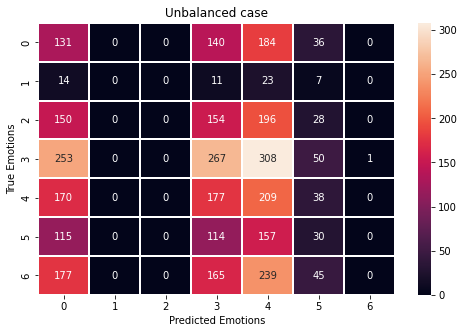

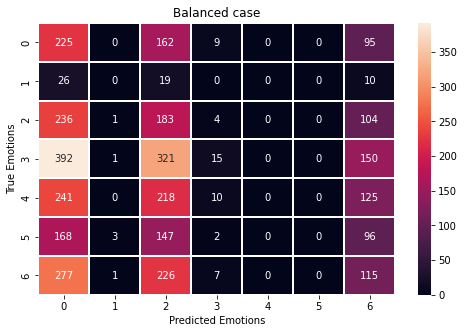

In [62]:
print("Emotions:\n")
for i in range(len(classes)):
  print(i, " - ", classes[i])

# Unbalanced data
cm = confusion_matrix(y_test_arr, prediction_arr, labels=[0,1,2,3,4,5,6])

plt.figure(figsize=(8, 5))
plt.title('Unbalanced case')
sns.heatmap(cm, annot=True, linewidths=1, fmt = 'd')
plt.xlabel('Predicted Emotions')
plt.ylabel('True Emotions')
plt.show()

# Balanced data
cm2 = confusion_matrix(y_test_arr, prediction_arr2, labels=[0,1,2,3,4,5,6])

plt.figure(figsize=(8, 5))
plt.title('Balanced case')
sns.heatmap(cm2, annot=True, linewidths=1, fmt = 'd')
plt.xlabel('Predicted Emotions')
plt.ylabel('True Emotions')
plt.show()